# Introduction

Autoencoders are neural networks used for unsupervised learning that aim to learn efficient representations of data. Here, we'll implement a simple autoencoder using PyTorch.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Load and Preprocess CIFAR-10 Dataset

Load the CIFAR-10 dataset and preprocess the data.

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Create DataLoader
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


100%|██████████| 170498071/170498071 [00:03<00:00, 48213388.19it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


# Autoencoder Architecture

Define the architecture of the autoencoder

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Set hyperparameters
input_dim = 32*32*3
encoding_dim = 16

# Create an instance of the autoencoder
autoencoder = Autoencoder(input_dim, encoding_dim)

In [ ]:
autoencoder

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=3072, out_features=16, bias=True)
    (1): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=16, out_features=3072, bias=True)
    (1): Sigmoid()
  )
)

# Loss Function and Optimizer

Define the loss function and optimizer for training the autoencoder.



In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Training the autoencoder

In [ ]:
num_epochs = 50
batch_size = 32

# Training loop
for epoch in range(num_epochs):
    for data in train_loader:
        inputs, _ = data
        inputs = inputs.reshape(-1, 32*32*3)
        outputs = autoencoder(inputs)
        # Compute the loss and perform backpropagation
        loss = criterion(outputs, inputs)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/50], Loss: 0.0525
Epoch [2/50], Loss: 0.0675
Epoch [3/50], Loss: 0.0618
Epoch [4/50], Loss: 0.0698
Epoch [5/50], Loss: 0.0611
Epoch [6/50], Loss: 0.0723
Epoch [7/50], Loss: 0.0668
Epoch [8/50], Loss: 0.0604
Epoch [9/50], Loss: 0.0694
Epoch [10/50], Loss: 0.0495
Epoch [11/50], Loss: 0.0548
Epoch [12/50], Loss: 0.0591
Epoch [13/50], Loss: 0.0562
Epoch [14/50], Loss: 0.0665
Epoch [15/50], Loss: 0.0492
Epoch [16/50], Loss: 0.0691
Epoch [17/50], Loss: 0.0743
Epoch [18/50], Loss: 0.0558
Epoch [19/50], Loss: 0.0525
Epoch [20/50], Loss: 0.0533
Epoch [21/50], Loss: 0.0586
Epoch [22/50], Loss: 0.0508
Epoch [23/50], Loss: 0.0765
Epoch [24/50], Loss: 0.0604
Epoch [25/50], Loss: 0.0617
Epoch [26/50], Loss: 0.0514
Epoch [27/50], Loss: 0.0762
Epoch [28/50], Loss: 0.0510
Epoch [29/50], Loss: 0.0447
Epoch [30/50], Loss: 0.0743
Epoch [31/50], Loss: 0.0669
Epoch [32/50], Loss: 0.0605
Epoch [33/50], Loss: 0.0530
Epoch [34/50], Loss: 0.0592
Epoch [35/50], Loss: 0.0691
Epoch [36/50], Loss: 0.0565
E

# Visualize results

In [ ]:
def visualize(model, flatten=False):
  # Set the model to evaluation mode
  model.eval()

  # Get a batch of data for visualization
  data_iter = iter(train_loader)
  images, _ = next(data_iter)
  if flatten:
    images = images.reshape(-1, 32*32*3)

  # Get the decoded images
  decoded_images = model(images)

  # Plot original and reconstructed images
  n = min(images.size(0), 8)  # Number of samples to plot
  plt.figure(figsize=(15, 7))

  for i in range(n):
      # Display original images
      plt.subplot(2, n, i + 1)
      if flatten:
        images = images.reshape(-1, 3, 32, 32)
      plt.imshow(images[i].permute(1, 2, 0))
      plt.axis('off')

      # Display reconstructed images
      plt.subplot(2, n, i + 1 + n)
      if flatten:
        decoded_images = decoded_images.reshape(-1, 3, 32, 32)

      plt.imshow(decoded_images[i].detach().permute(1, 2, 0).numpy())
      plt.axis('off')

  plt.show()

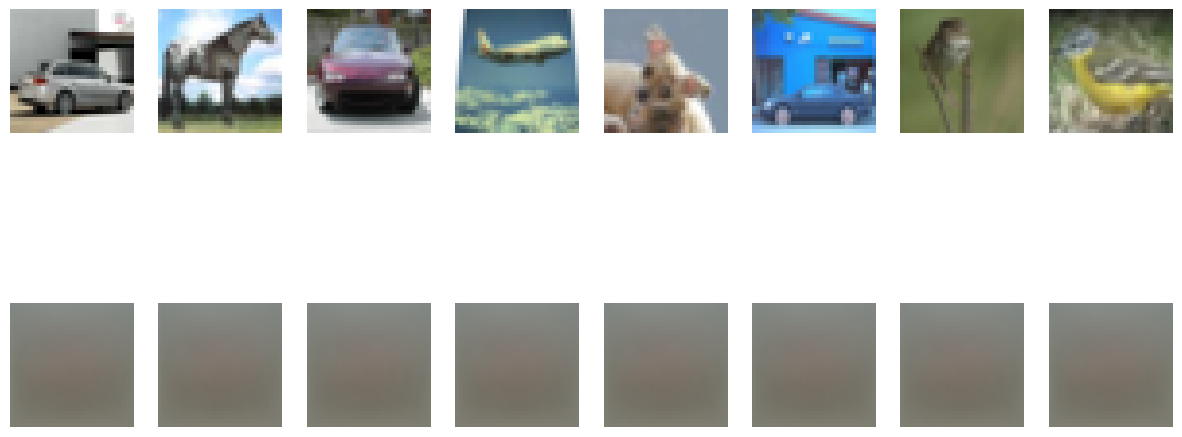

In [ ]:
visualize(autoencoder, flatten=True)

# Define Convolutional Autoencoder

In [ ]:
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Create an instance of the Convolutional Autoencoder
conv_autoencoder = ConvAutoencoder()

In [ ]:
criterion = nn.MSELoss()  # Mean Squared Error Loss for image reconstruction
optimizer = optim.Adam(conv_autoencoder.parameters(), lr=0.001)

In [ ]:
num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    for data in train_loader:
        inputs, _ = data
        outputs = conv_autoencoder(inputs)

        # Compute the loss and perform backpropagation
        loss = criterion(outputs, inputs)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 0.0025
Epoch [2/10], Loss: 0.0019
Epoch [3/10], Loss: 0.0014
Epoch [4/10], Loss: 0.0010
Epoch [5/10], Loss: 0.0013
Epoch [6/10], Loss: 0.0011
Epoch [7/10], Loss: 0.0013
Epoch [8/10], Loss: 0.0009
Epoch [9/10], Loss: 0.0009
Epoch [10/10], Loss: 0.0007


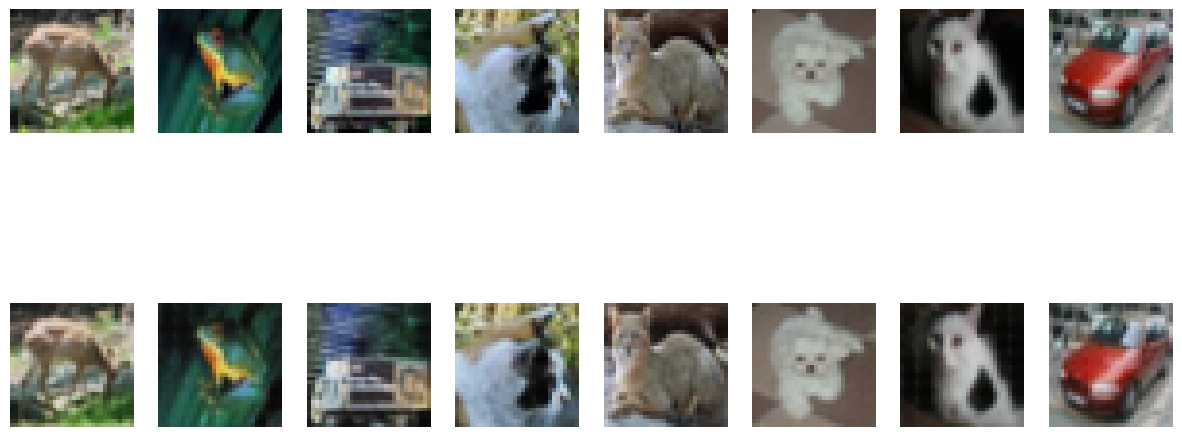

In [ ]:
visualize(conv_autoencoder)